<h1><center>Data Analysis & Visualization</center></h1>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams

%matplotlib inline

In [38]:
df = pd.read_excel('data.xlsx')
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## country and salary

In [5]:
df['native-country'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [6]:
df['native-country'].replace(' ?',np.NaN,inplace=True)

In [7]:
df['salary'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [8]:
salary_country = pd.crosstab(df['native-country'],df['salary']).reset_index().sort_values(by=[' <=50K'],ascending=False).head(5)
salary_country

salary,native-country,<=50K,>50K
38,United-States,21999,7171
25,Mexico,610,33
29,Philippines,137,61
32,Puerto-Rico,102,12
7,El-Salvador,97,9


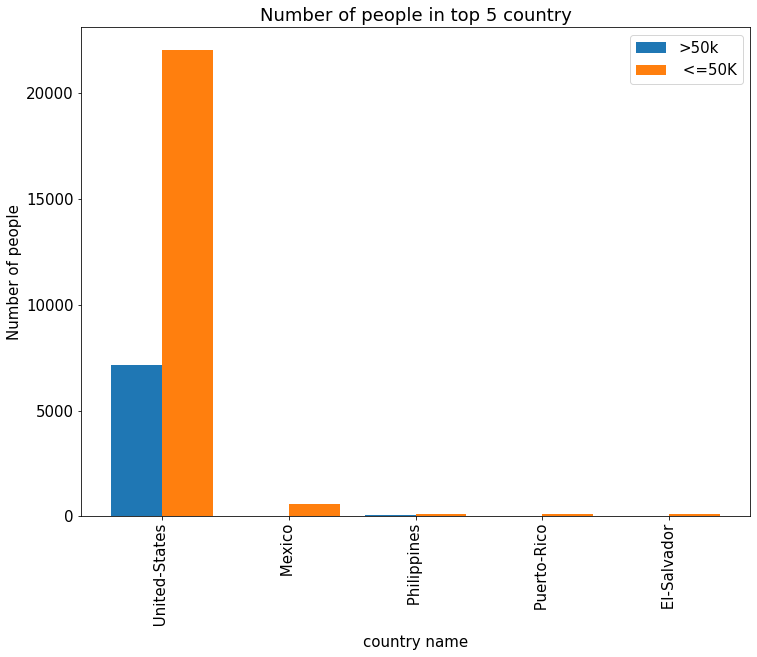

In [10]:
plt.figure(figsize=(12,9))
plt.rcParams.update({'font.size':15})

x = list(salary_country['native-country'].unique()) 
x_axis = np.arange(len(x))
plt.bar(x_axis - 0.2, salary_country[' >50K'], 0.4, label = '>50k')
plt.bar(x_axis + 0.2, salary_country[' <=50K'], 0.4, label = ' <=50K')
plt.xticks(x_axis, x,rotation=90)
plt.xlabel("country name")
plt.ylabel("Number of people")
plt.title("Number of people in top 5 country")
plt.legend();

Based on the graph most people are from united-states and every countries most people have 50K or below 50k salary. This bar chart is choose because this chart is easy to read and easy to understand also when we have many category and we need to compare this bar chart is best.

## Race and salary

In [11]:
salary_race = pd.crosstab(df['race'],df['salary']).reset_index().sort_values(by=[' <=50K'],ascending=False)
salary_race

salary,race,<=50K,>50K
4,White,20699,7117
2,Black,2737,387
1,Asian-Pac-Islander,763,276
0,Amer-Indian-Eskimo,275,36
3,Other,246,25


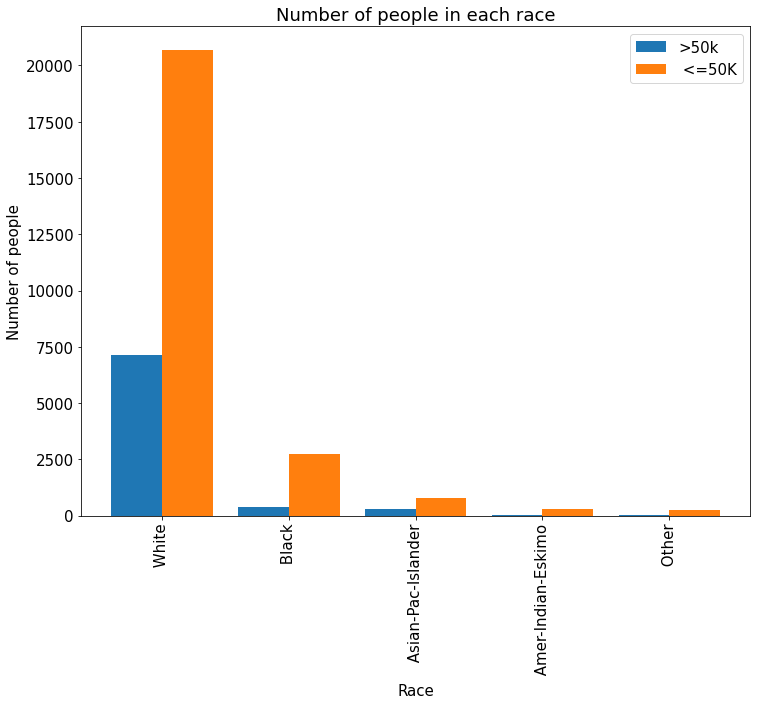

In [12]:
plt.figure(figsize=(12,9))
x = list(salary_race['race'].unique()) 
x_axis = np.arange(len(x))
plt.bar(x_axis - 0.2, salary_race[' >50K'], 0.4, label = '>50k')
plt.bar(x_axis + 0.2, salary_race[' <=50K'], 0.4, label = ' <=50K')
plt.xticks(x_axis, x,rotation=90)
plt.xlabel("Race")
plt.ylabel("Number of people")
plt.title("Number of people in each race")
plt.legend();

Based on the graph most people are from white race and each race people's income is 50k or below 50K. This bar chart is choose because this chart is easy to read and easy to understand.

## Capital-gain and Salary

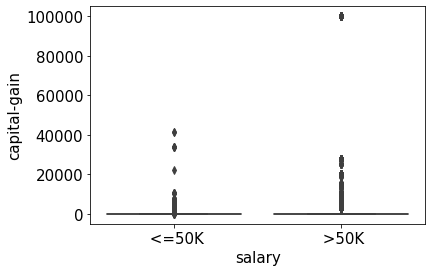

In [13]:
sns.boxplot(x = 'salary', y = 'capital-gain', data = df);

Based on the graph whose salary is below <= 50k their capital-gain is between 0 to 50,000 and whose salary is above 50k their capital-gain is between 0 to 10,000. whose salary is above 50k their capital-gain has high variance. We choose boxplot because when we want to know about the spread of data there has no other chart as useful as this.

## Sex and Salary

In [14]:
below_50 = df[df['salary'] == " <=50K"]
above_50 = df[df['salary'] == " >50K"]

In [15]:
below_50.shape,above_50.shape

((24720, 15), (7841, 15))

In [16]:
below_50['sex'].unique()

array([' Male', ' Female'], dtype=object)

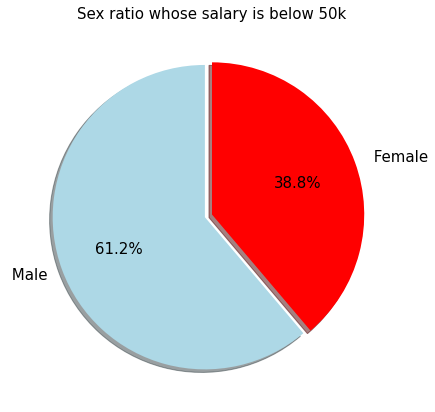

In [17]:
# below 50 Data to plot
labels = below_50['sex'].value_counts(sort = True).index
sizes = below_50['sex'].value_counts(sort = True)

colors = ["lightblue","red"]
explode = (0.05,0)  # explode 1st slice
 
rcParams['figure.figsize'] = 7,7
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90,)

plt.title('Sex ratio whose salary is below 50k',size = 15)
plt.show()

Based on the above pie chart 61.2% male receive below 50k salary and 38.8% female receive below 50k salary. We choose this chart because when we compare two category pie chart is the best option for us.

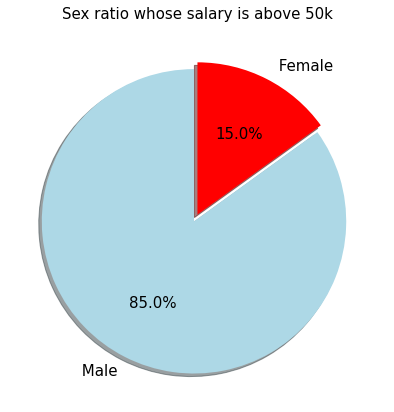

In [18]:
# above 50 Data to plot
labels = above_50['sex'].value_counts(sort = True).index
sizes = above_50['sex'].value_counts(sort = True)

colors = ["lightblue","red"]
explode = (0.05,0)  # explode 1st slice
 
rcParams['figure.figsize'] = 7,7
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90,)

plt.title('Sex ratio whose salary is above 50k',size = 15)
plt.show()

Based on the above pie chart 85% male receive above 50k salary and 15% female receive above 50k salary. when salary is above 50k the amount of male people are comparatively high. We choose this chart because when we compare two category pie chart is the best option for us.

## capital-loss and salary

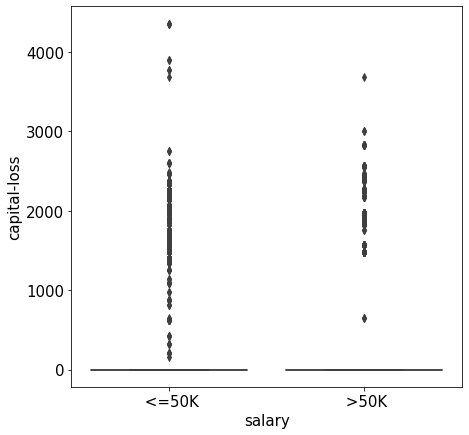

In [19]:
sns.boxplot(x = 'salary', y = 'capital-loss', data = df);

Based on the graph whose salary is below <= 50k their capital-loss is between 0 to above 4000 and whose salary is above 50k their capital-loss is between 0 to almost 3800. whose salary is below 50k their capital-loss has high variance. We choose boxplot because when we want to know about the spread of data there has no other chart as useful as this.

In [20]:
df['sex'].unique()

array([' Male', ' Female'], dtype=object)

In [21]:
df['salary'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [22]:
df['sex_salary'] = df['sex'].astype(str) + df['salary'].astype(str)
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary,sex_salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,Male <=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,Male <=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,Male <=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,Male <=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,Female <=50K


## age, salary and sex

In [23]:
age_sex_salary = df[['age','sex_salary']].groupby('sex_salary')['age'].mean().reset_index().sort_values(by='age',ascending = True)
age_sex_salary

,sex_salary,age
0,Female <=50K,36.210801
2,Male <=50K,37.147012
1,Female >50K,42.125530
3,Male >50K,44.625788


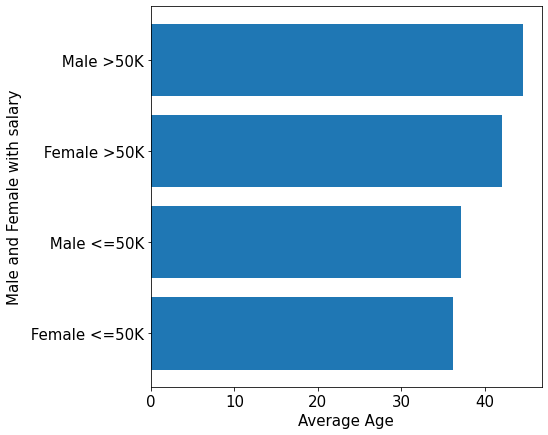

In [24]:
plt.barh( age_sex_salary["sex_salary"],age_sex_salary["age"])
plt.xlabel('Average Age')
plt.ylabel('Male and Female with salary');

Based on the graph salary increase with age. Younger male and female get less salary compare to older male and femal. And male get a slightly high amount than female. we choose this horizontal bar chart because this chart is easy to read and understand the core information.

## hours-per-week, salary and sex

In [25]:
work_sex_salary = df[['hours-per-week','sex_salary']].groupby('sex_salary')['hours-per-week'].mean().reset_index().sort_values(by='hours-per-week',
                                                                                                                              ascending = True)
work_sex_salary

,sex_salary,hours-per-week
0,Female <=50K,35.916701
1,Female >50K,40.426633
2,Male <=50K,40.693879
3,Male >50K,46.366106


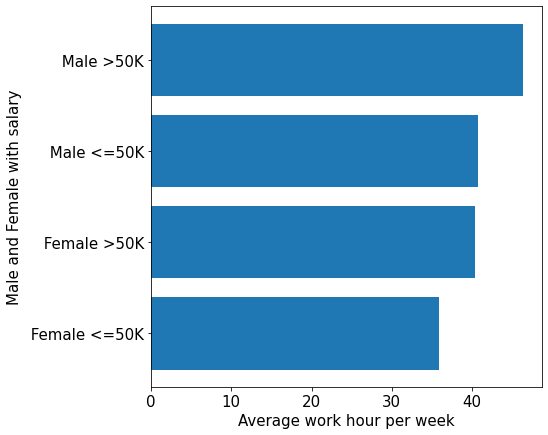

In [26]:
plt.barh( work_sex_salary["sex_salary"],work_sex_salary["hours-per-week"])
plt.xlabel('Average work hour per week')
plt.ylabel('Male and Female with salary');

Based on the graph whose salary is higher they work more in week. And man work higher than woman to get the same amount of money. This horizontal bar graph is chosen because we can get a better understanding of data by following it. we choose this chart because this chart is easy to read and understand the core information.

## Marital-status and salary

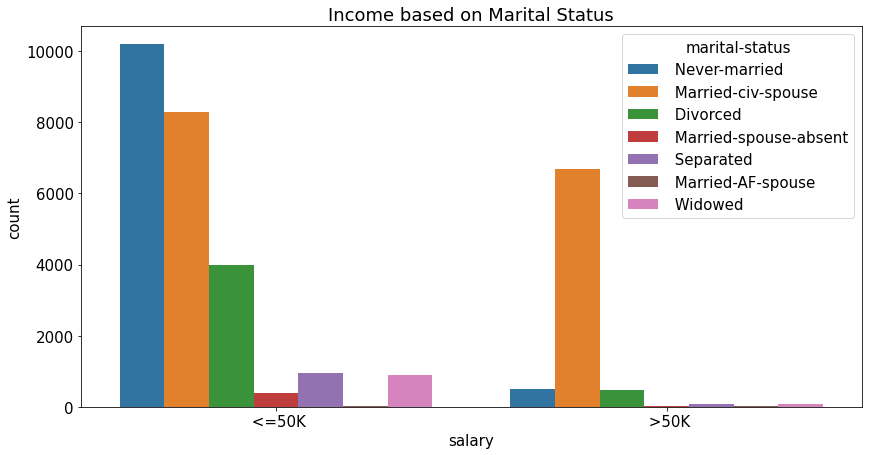

In [27]:
plt.figure(figsize=(14,7))
sns.countplot(x='salary', hue='marital-status', data=df)
plt.title("Income based on Marital Status");

Based on the graph we can say whose income is 50k or below 50k they are either never married or married-civ-spouse. And whose income is above 50k they are married-civ-spouse. We chose this chart because without it we wouldn't be able to display this much information.

## Occupation and salary

In [28]:
df['occupation'].replace(' ?',np.NaN,inplace=True)

In [29]:
salary_occupation = pd.crosstab(df['occupation'],df['salary']).reset_index().sort_values(by=[' <=50K'],ascending=False)
salary_occupation

salary,occupation,<=50K,>50K
0,Adm-clerical,3263,507
2,Craft-repair,3170,929
7,Other-service,3158,137
11,Sales,2667,983
9,Prof-specialty,2281,1859
3,Exec-managerial,2098,1968
6,Machine-op-inspct,1752,250
5,Handlers-cleaners,1284,86
13,Transport-moving,1277,320
4,Farming-fishing,879,115


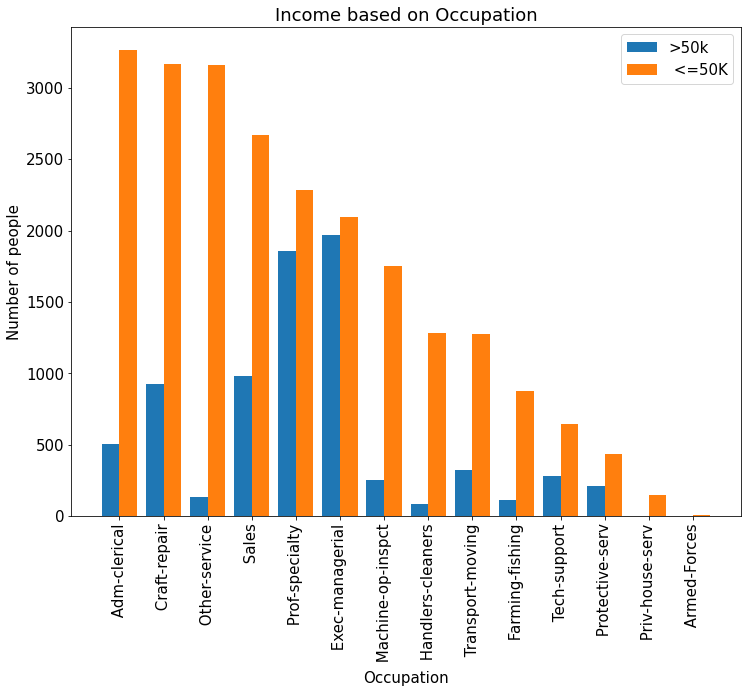

In [30]:
plt.figure(figsize=(12,9))
x = list(salary_occupation['occupation'].unique()) 
x_axis = np.arange(len(x))
plt.bar(x_axis - 0.2, salary_occupation[' >50K'], 0.4, label = '>50k')
plt.bar(x_axis + 0.2, salary_occupation[' <=50K'], 0.4, label = ' <=50K')
plt.xticks(x_axis, x,rotation=90)
plt.xlabel("Occupation")
plt.ylabel("Number of people")
plt.title("Income based on Occupation")
plt.legend();

Based on the graph most people who get above 50k salary their occupation is Exec-managerial & Prof-specialty. and whose get 50k or below 50k salary they mostly work on Adm-clerical & Craft-repair occupation. This chart is easy to understand thats why we choose this chart to visualize the information.

## Hours per week, age and salary

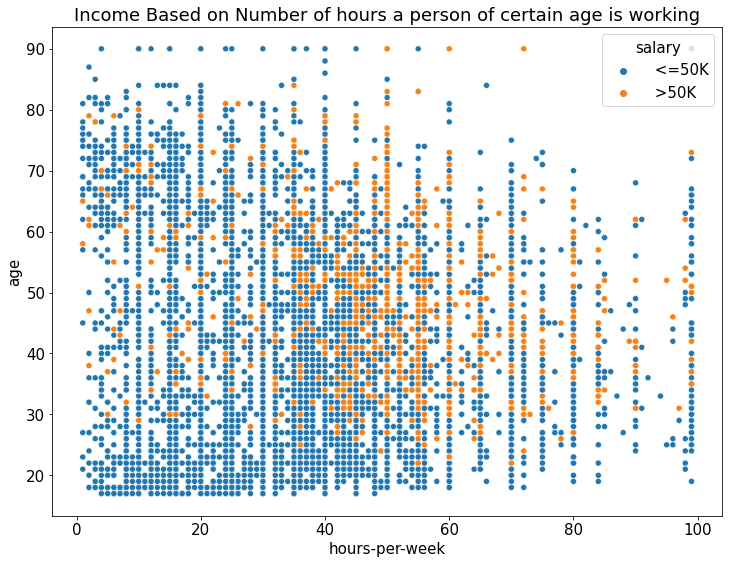

In [31]:
plt.figure(figsize=(12,9))
sns.scatterplot(x=df['hours-per-week'], y=df['age'], hue=df['salary'])
plt.title('Income Based on Number of hours a person of certain age is working');

Based on the graph younger people work less and they also income less compare to older people. When peoples age increase they work more hour to get high salary. This scatterplot is best to show the correlation between features thats why we choose this graph to visualize the information.

## work-class and salary

In [32]:
df['workclass'].replace(' ?',np.NaN,inplace=True)

In [33]:
salary_workclass = pd.crosstab(df['workclass'],df['salary']).reset_index().sort_values(by=[' <=50K'],ascending=False)
salary_workclass

salary,workclass,<=50K,>50K
3,Private,17733,4963
5,Self-emp-not-inc,1817,724
1,Local-gov,1476,617
6,State-gov,945,353
0,Federal-gov,589,371
4,Self-emp-inc,494,622
7,Without-pay,14,0
2,Never-worked,7,0


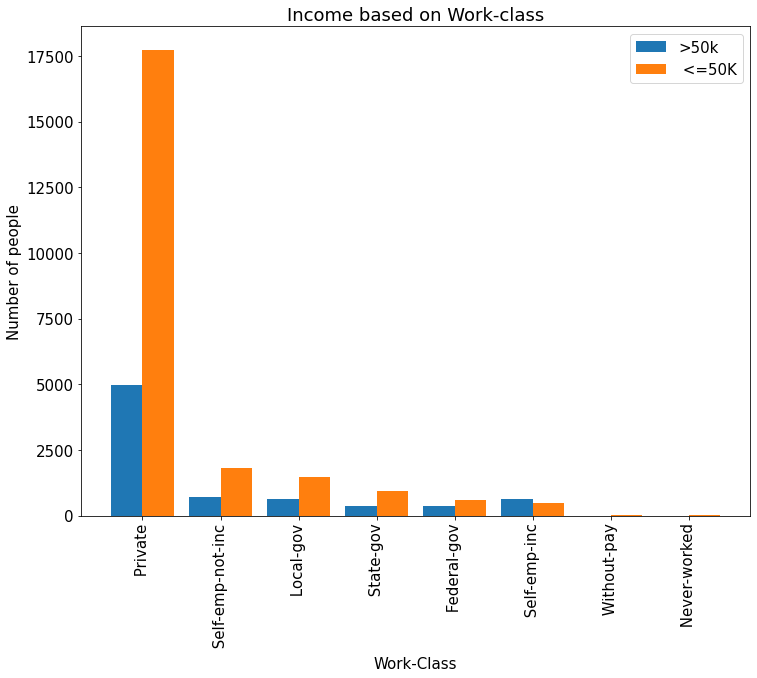

In [34]:
plt.figure(figsize=(12,9))
x = list(salary_workclass['workclass'].unique()) 
x_axis = np.arange(len(x))
plt.bar(x_axis - 0.2, salary_workclass[' >50K'], 0.4, label = '>50k')
plt.bar(x_axis + 0.2, salary_workclass[' <=50K'], 0.4, label = ' <=50K')
plt.xticks(x_axis, x,rotation=90)
plt.xlabel("Work-Class")
plt.ylabel("Number of people")
plt.title("Income based on Work-class")
plt.legend();

Based on the graph most people work on the private workplace. If people have self-emp-inc they can earn more compare to other work-class. Some people work on without-pay whose income is 50k or below 50k. When category is higher than 3 bar chart is more suitable to visualize the information thats why we choose this chart.

## Education and Salary

In [35]:
salary_education = pd.crosstab(df['education'],df['salary']).reset_index().sort_values(by=[' <=50K'],ascending=False)
salary_education

salary,education,<=50K,>50K
11,HS-grad,8826,1675
15,Some-college,5904,1387
9,Bachelors,3134,2221
1,11th,1115,60
8,Assoc-voc,1021,361
0,10th,871,62
7,Assoc-acdm,802,265
12,Masters,764,959
5,7th-8th,606,40
6,9th,487,27


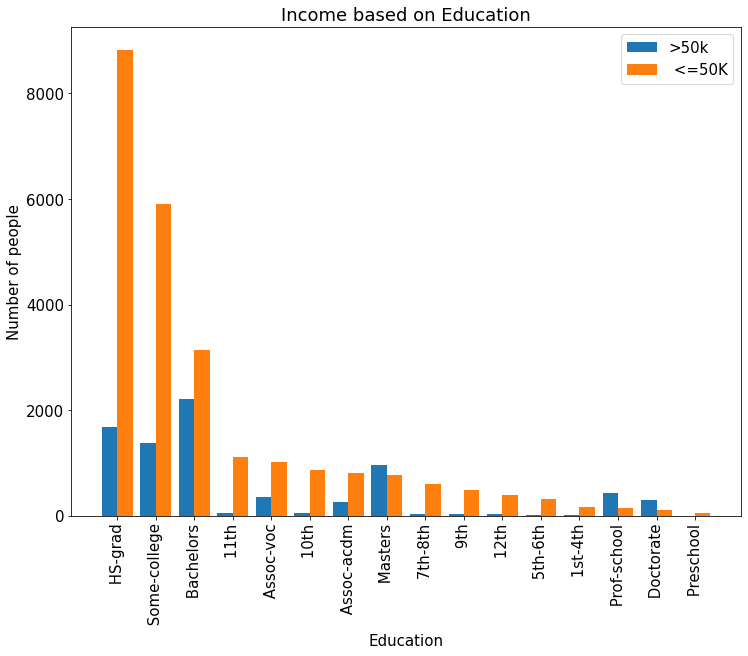

In [36]:
plt.figure(figsize=(12,9))
x = list(salary_education['education'].unique()) 
x_axis = np.arange(len(x))
plt.bar(x_axis - 0.2, salary_education[' >50K'], 0.4, label = '>50k')
plt.bar(x_axis + 0.2, salary_education[' <=50K'], 0.4, label = ' <=50K')
plt.xticks(x_axis, x,rotation=90)
plt.xlabel("Education")
plt.ylabel("Number of people")
plt.title("Income based on Education")
plt.legend();

Based on the graph who have Masters, prof-school and doctorate they can earn more. And whose income is 50k or below 50k most people's education is HS-grad, some-college and bachelors. Educated people have comparatively higher incomes. We choose this chart cause there has many categories.